### Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to WebMD, "about 5 million Americans need a blood transfusion every year".


### AIM: To use multinomial data set to visualise the best used method or model 
### 1 Import   
### 2 Feature Selection Technique
### 3 Data visualisation 
### 4 Resampling
### 5 Spliting transufition data into train and test 
### 6 Grafical Representation 
#### 6.1 Heatmaps 
#### 6.2 Histogram 
##### 6.2.1 BOXCOX 
##### 6.2.2 SQUARE ROOT 
##### 6.2.3 LOG 
##### 6.3 Violin plot 
### 7 Models: 
#### 7.1 Logistic Regression -- 1 
#### 7.2 Random Forest -- 2 
#### 7.3 Decision Tree -- 3 
#### 7.4 Gaussian Naive Base -- 4 
#### 7.5 KNeighbors -- 5  
#### 7.6 SVM -- 6 
#### 7.7 ADaBoost -- 7  
#### 7.8 Gradient Boosting -- 8  
#### 7.9 Bagging -- 9  
### 8 Model analysis 
### 9 Model Graphical Representation 
### 10 MAX Voting 
#### 10.1 Method 1 
#### 10.2 Method 2 
### 11 Pickling 


In [1]:
import numpy as np
import statistics
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

##### Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.


In [3]:
#Reading the csv data file 
#Name: Blood Transfusion Centre- UCI 
data = pd.read_csv(r"C:\Users\Sandhya\Downloads\transfusion.csv")

##### Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.

#### RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:

#### R (Recency - months since the last donation)
#### F (Frequency - total number of donation)
#### M (Monetary - total blood donated in c.c.)
#### T (Time - months since the first donation)
#### a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)


In [4]:
#To change the name of the name of the columns in the given data
data=data.rename(columns={"whether he/she donated blood in March 2007":"Present"})
data=data.rename(columns={"Recency (months)":"Recent"})
data=data.rename(columns={"Frequency (times)":"Frequency"})
data=data.rename(columns={"Monetary (c.c. blood)":"AmountOfBlood"})
data=data.rename(columns={"Time (months)":"Months"})


# 2.0 FEATURE SELECTION TECHNIQUE

### You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
### Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
### Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 4 features for the dataset.


[0.28897993 0.12447495 0.12922061 0.45732451]


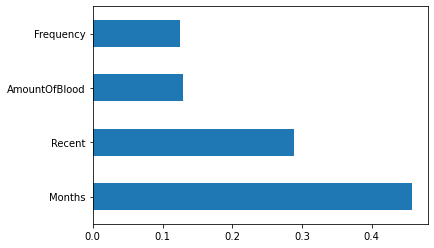

In [5]:
#To define a variable 'features' that has all the columns except the boolean column 'Present'
features1=data.drop("Present", axis=1)
#To define a variable 'target' that has the boolean column 'Present'
target1 = data["Present"] 
model = ExtraTreesClassifier(n_estimators=100)
model.fit(features1,target1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features1.columns)
feat_importances.nlargest(1000).plot(kind='barh')
plt.show()

In [6]:
#WE CAN CONCLUDE FROM THE ABOVE ANALYSIS THAT FREQUENCY HAS THE LEAST WEIGHTAGE 

# 3.0 DATA VISUALISATION  

In [7]:
data.head()

,Recent,Frequency,AmountOfBlood,Months,Present
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


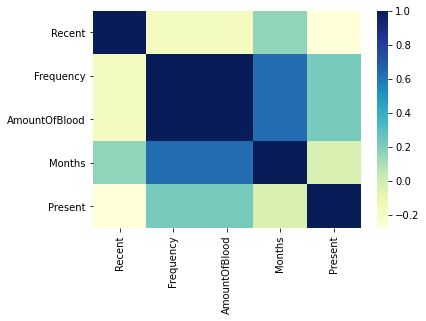

In [8]:
sns.heatmap(data.corr(),cmap="YlGnBu")

In [9]:
#To drop the column frequency as it has the least significance as seen from the head map and feature technique 
data = data.drop('Frequency',axis=1)

In [10]:
#To remove the missing value. Returns object with labels on given axis omitted where alternately any or all of the data are missing
#The paarameter means that if all the values are NA then drop the label 
data = data.dropna(how='all')

In [11]:
data["Present"].value_counts()

0    570
1    178
Name: Present, dtype: int64

In [12]:
data.sum

<bound method DataFrame.sum of      Recent  AmountOfBlood  Months  Present
0         2          12500      98        1
1         0           3250      28        1
2         1           4000      35        1
3         2           5000      45        1
4         1           6000      77        0
..      ...            ...     ...      ...
743      23            500      38        0
744      21            500      52        0
745      23            750      62        0
746      39            250      39        0
747      72            250      72        0

[748 rows x 4 columns]>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recent         748 non-null    int64
 1   AmountOfBlood  748 non-null    int64
 2   Months         748 non-null    int64
 3   Present        748 non-null    int64
dtypes: int64(4)
memory usage: 29.2 KB


In [14]:
data.describe()

,Recent,AmountOfBlood,Months,Present
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,1378.676471,34.282086,0.237968
std,8.095396,1459.826781,24.376714,0.426124
min,0.000000,250.000000,2.000000,0.000000
25%,2.750000,500.000000,16.000000,0.000000
50%,7.000000,1000.000000,28.000000,0.000000
75%,14.000000,1750.000000,50.000000,0.000000
max,74.000000,12500.000000,98.000000,1.000000


In [15]:
data.columns

Index(['Recent', 'AmountOfBlood', 'Months', 'Present'], dtype='object')

In [16]:
data["Present"].unique()

array([1, 0], dtype=int64)

# 4.0 RESAMPLING

### This is a method in which the yes\no takes are taken in equal amount so that we can get better accuracy

In [17]:
#This method had not increased the accuracy of any of the models hence it was not used in our program 
#This has been commented for the above reason 

In [18]:
#BEFORE
data.Present.value_counts()

0    570
1    178
Name: Present, dtype: int64

In [119]:
from sklearn.utils import resample
#Since the boolean value '1' has the minority 
data_minority = data[data.Present==0]
#Since the boolean value '0' has the majority 
data_majority = data[data.Present==1]

In [120]:
#Resampling out data by selecting the number of samples needed 
data_majority_upsampled = resample(data_majority, replace=True,n_samples=178,random_state=42)

In [121]:
#To concatinate 
data = pd.concat([data_minority, data_majority_upsampled])

In [122]:
#AFTER
data.Present.value_counts()

1    178
0    178
Name: Present, dtype: int64

# 5.0 SPLITING TRANSFUSION INTO TRAIN AND TEST DATASETS

In [123]:
#To define a variable 'features' that has all the columns except the boolean column 'Present'
features=data.drop("Present", axis=1)
#To define a variable 'target' that has the boolean column 'Present'
target = data["Present"]

In [124]:
#To define variables that split the data in the data gets into features,target and X and Y 
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.3,random_state=101)
#X_train variable has some rows of features to use for the train of the  machine 
#X_test variable has some rows of features to use for testing  
#Y_train variable has some rows of target to use for the train of the  machine 
#X_train variable has some rows of target to use for testing

In [125]:
features.head()

,Recent,AmountOfBlood,Months
174,1.098612,250,2
599,2.564949,2750,39
382,2.708050,250,14
182,1.098612,1000,35
135,1.098612,750,19


In [126]:
#To find the rows and columns of the data set 
data.shape

(356, 4)

In [127]:
#To find the rows and columns of the training set 
X_train.shape

(249, 3)

In [128]:
#To find the rows and columns of the testing set 
X_test.shape

(107, 3)

# 6.0 GRAPHICAL REPRESENTATION 

## 6.1 HEATMAP

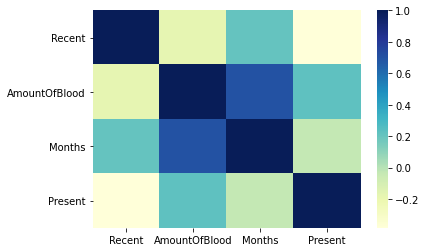

In [129]:
#To find the correlation between variables and visualising using colours in a heatmap
sns.heatmap(data.corr(),cmap="YlGnBu")

In [130]:
#After removing frequency we can see that it has a better correlation than before 

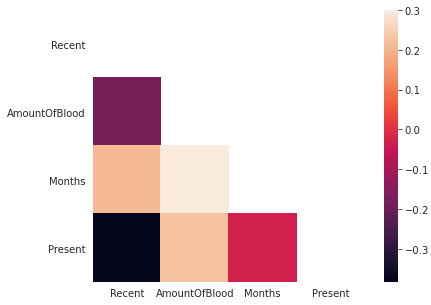

In [131]:
#To generate a mask for the upper triangle
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #To set up the matplotlib figure
    f, ax = plt.subplots(figsize=(7, 5))
    #To draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.3, square=True)

In [132]:
#Lower triangle heat map for easier understanding 

## 6.2 BARGRAPH

Text(0, 0.5, 'Present')

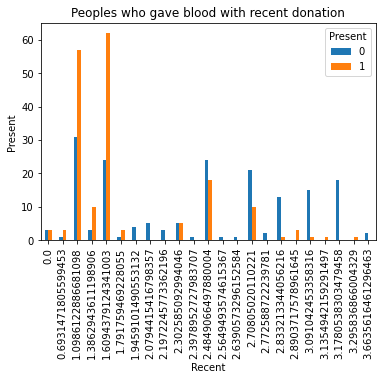

In [133]:
#To visualize how many people gave blood in March 2017 depending on their recent visits
%matplotlib inline
pd.crosstab(data.Recent,data.Present).plot(kind='bar')
plt.title('Peoples who gave blood with recent donation')
plt.xlabel('Recent')
plt.ylabel('Present')


In [134]:
#To see at which rate people are prefering to donate blood for future refernce 

## 6.3  HISTOGRAM

(array([ 6.,  4., 88., 13., 90., 12., 53., 52., 36.,  2.]),
 array([0.        , 0.36635616, 0.73271233, 1.09906849, 1.46542466,
        1.83178082, 2.19813699, 2.56449315, 2.93084932, 3.29720548,
        3.66356165]),
 <a list of 10 Patch objects>)

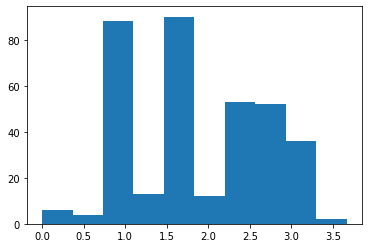

In [135]:
#To visualise using histograph on recency of the people's donation
plt.hist(data.Recent)

### 6.3.1 BOXCOX---only for positive data


In [136]:
# This method to change the extremely scewed graph did not work as there were values of '0' which doesn't come under positive data

In [137]:
original_data = data.Recent

In [138]:
train,test = train_test_split(original_data, shuffle=False)

In [139]:
#train_data,fitted_lambda = stats.boxcox(train)

### 6.3.2 Square root 

In [140]:
# No change in the accuarcy even upon trying this method 

In [141]:
# data.Recent = data.Recent**(1/3) -- not much difference


### 6.3.3 LOG 

In [142]:
# A change in the graph can be seen applying log 

In [143]:
data.Recent = np.log(data.Recent + 1)
data.Recent.describe()

count    356.000000
mean       1.031576
std        0.282707
min        0.000000
25%        0.741276
50%        0.959135
75%        1.276294
max        1.539779
Name: Recent, dtype: float64

(array([ 6.,  0.,  0.,  4., 88., 13., 90., 23., 94., 38.]),
 array([0.        , 0.15397795, 0.30795589, 0.46193384, 0.61591178,
        0.76988973, 0.92386767, 1.07784562, 1.23182357, 1.38580151,
        1.53977946]),
 <a list of 10 Patch objects>)

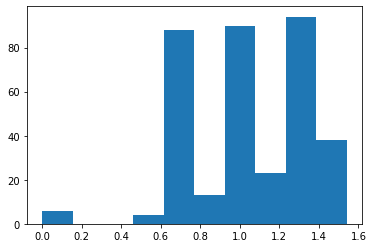

In [144]:
plt.hist(data.Recent)

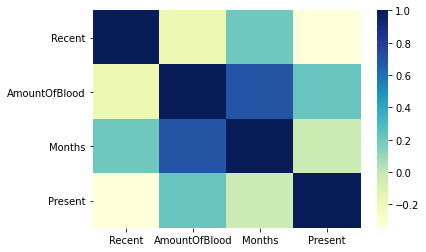

In [145]:
sns.heatmap(data.corr(),cmap="YlGnBu")

(array([200.,  89.,  36.,  20.,   3.,   1.,   4.,   1.,   1.,   1.]),
 array([  250.,  1475.,  2700.,  3925.,  5150.,  6375.,  7600.,  8825.,
        10050., 11275., 12500.]),
 <a list of 10 Patch objects>)

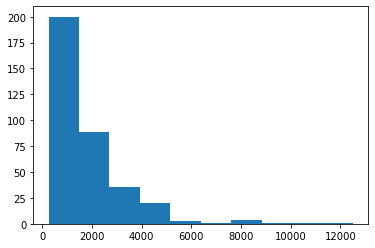

In [146]:
#To visualise using histograph on previous amount of blood donation
plt.hist(data.AmountOfBlood)

## 6.4 VIOLIN PLOT

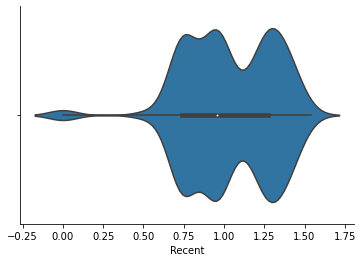

In [147]:
#To visualise the distribution of the data and its probability density using Violin plot for the column Recent 
sns.violinplot(data['Recent'])
sns.despine()
#We can conclude how frequently people are donating blood 

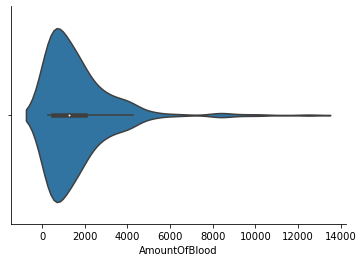

In [148]:
#To visualise the distribution of the data and its probability density using Violin plot for the column Amount of blood
sns.violinplot(data['AmountOfBlood'])
sns.despine()
#We can conclude how much amount of blood a person is willing to donate

# 7 Models

## 7.1 Logistic Regression -- 1

#### Logistic regression is similar to linear regression exceptlogistic regression predicts whether something, is true or false instead of predicting something continuous, like, sighs. Also instead of fitting a line to the data logistic regression fits an s-shaped logistic function.Although, logistic regression, tells the probability that the blood is donated or not it's usually used for classification.Logistic regressions ability to provide probabilities and classify, new samples using continuous and discrete measurements makes it a popular machine learning method.One big difference between linear regression and logistic regression is how the line is fit to the data


In [149]:
#Using variable modelLR for logistic Regression
modelLR = LogisticRegression(solver='lbfgs')
#To fit this data of training set of X and Y to the model
modelLR.fit(X_train, Y_train)

LogisticRegression()

Accuracy =  0.72 


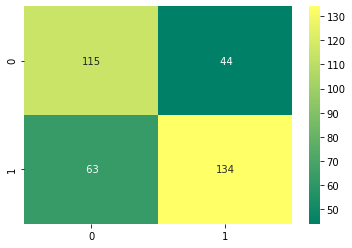

In [150]:
#To define the variable predLR to predict in boolean value based on the observation of the training case
predLR= modelLR.predict(X_test)
#To test how accurately the predition of LR matches with the original data set 
acc=accuracy_score(Y_test, predLR)
print("Accuracy =  {:.2f} ".format( acc))
y_pred = cross_val_predict(modelLR,features, target,cv=10)
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 

sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

In [151]:
#To show the pattern in which the output of the test cases
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [152]:
#To find the score by cross evaluation
result_LR = cross_val_score(modelLR,features, target, cv=10, scoring="accuracy" )
print("Cross val Score = {:.2f}".format(result_LR.mean()))

Cross val Score = 0.70


The Accuracy =  0.6703333333333333


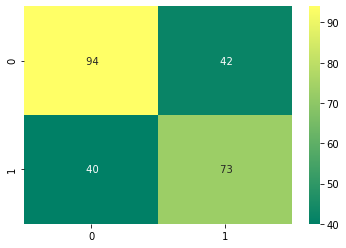

In [153]:
#To find the accuracy by cross evaluation in the training set 
trainresult_LR = cross_val_score(modelLR,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_LR.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelLR,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7


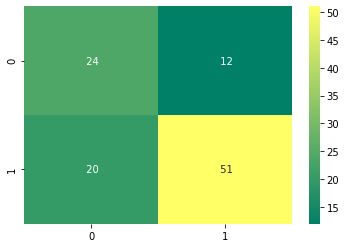

In [154]:
#To find the accuracy by cross evaluation in the testing set 
testresult_LR = cross_val_score(modelLR,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_LR.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelLR,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

## 7.2 Random Forest -- 2

### Random Forests grows many classification trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes.


In [155]:
for i in range (100,701,100):
    modelRF = RandomForestClassifier(n_estimators=i)
    modelRF.fit(X_train,Y_train)
    result_RF = cross_val_score(modelRF,features, target, cv=10, scoring="accuracy" )
    print(i,"Cross val Score ", result_RF.mean())

100 Cross val Score  0.7699206349206349
200 Cross val Score  0.7753968253968254
300 Cross val Score  0.766984126984127
400 Cross val Score  0.7698412698412698
500 Cross val Score  0.7669841269841269
600 Cross val Score  0.7726984126984127
700 Cross val Score  0.7643650793650794


In [156]:
#Using variable modelLR for Random Forest 
modelRF = RandomForestClassifier(n_estimators=500)

In [157]:
#To fit this data of training set of X and Y to the model
modelRF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500)

Accuracy =  0.7663551401869159


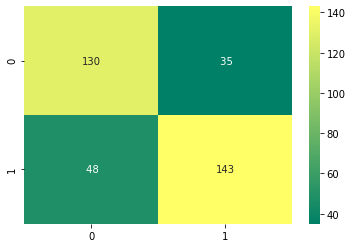

In [158]:
#To define the variable predRF to predict in boolean value 
predRF= modelRF.predict(X_test)
#To test how accurately the predition of RF matches with the original data set
acc=accuracy_score(Y_test, predRF)
print("Accuracy = ", acc)
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelRF,features, target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

In [159]:
#To find the score by cross evaluation
result_RF = cross_val_score(modelRF,features, target, cv=10, scoring="accuracy" )
print("Cross val Score ", result_RF.mean())

Cross val Score  0.7725396825396825


The Accuracy =  0.747


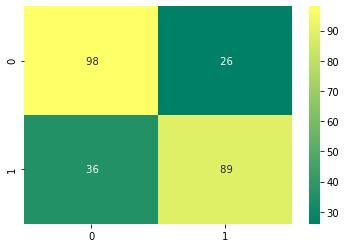

In [160]:
#To find the accuracy by cross evaluation in the training set 
trainresult_RF = cross_val_score(modelRF,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_RF.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelRF,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6909090909090909


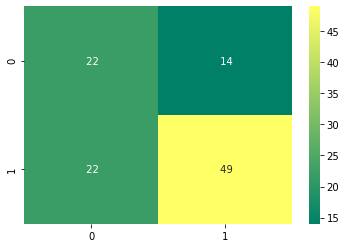

In [161]:
#To find the accuracy by cross evaluation in the testing set
testresult_RF = cross_val_score(modelRF,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_RF.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelRF,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

## 7.3 Decision Tree -- 3

### A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes) 


In [162]:
#Using variable modelDT for Decision Tree
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(criterion="gini", min_samples_split=10, min_samples_leaf=1,max_features="auto")
#To fit this data of training set of X and Y to the model
modelDT.fit(X_train, Y_train)

DecisionTreeClassifier(max_features='auto', min_samples_split=10)

In [163]:
#To define the variable pred_Tree to predict in boolean value 
pred_Tree = modelDT.predict(X_test)
#To test how accurately the predition of LR matches with the original data set
accDT= accuracy_score(pred_Tree, Y_test)
print("Accuracy = {:.2}".format(accDT))

Accuracy = 0.68


In [164]:
#To use k-Fold for cross validation Cross-Validation
kfold = KFold(n_splits=10, random_state=22)
result_tree = cross_val_score(modelDT,features, target, cv=10, scoring="accuracy" )
print("Result of mean using K-fold {:.2}".format(result_tree.mean()))

Result of mean using K-fold 0.71


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


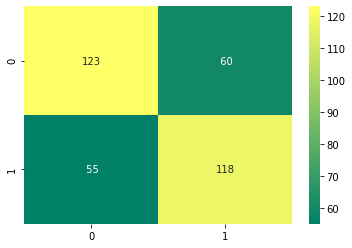

In [165]:
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelDT,features,target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

0.6944999999999999


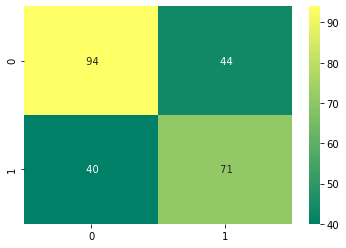

In [166]:
#To find the accuracy by cross evaluation in the training set 
trainresult_tree = cross_val_score(modelDT,X_train, Y_train, cv=10, scoring="accuracy" )
print(trainresult_tree.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelDT,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

0.6154545454545455


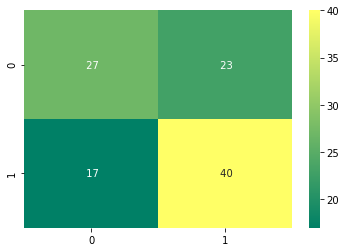

In [167]:
#To find the accuracy by cross evaluation in the testing set
testresult_tree = cross_val_score(modelDT,X_test, Y_test, cv=10, scoring="accuracy" )
print(testresult_tree.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelDT,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

## 7.4 Gaussian Naive Base -- 4

## P(h|d) = (P(d|h) * P(h)) / P(d)
### Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution.
### This extension of naive Bayes is called Gaussian Naive Bayes. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.

Accuracy  0.7383177570093458
cross val score  0.6934126984126985


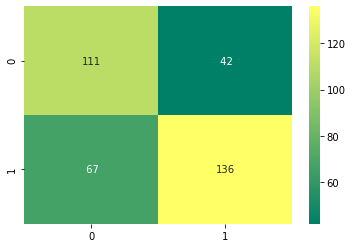

In [168]:
#Using variable modelNB for Gaussian Naive Base  
modelNB = GaussianNB()
#To fit this data of training set of X and Y to the model
modelNB.fit(X_train,Y_train)
#To define the variable pred_nb to predict in boolean value 
pred_nb = modelNB.predict(X_test)
acc1 = accuracy_score(pred_nb, Y_test)
print("Accuracy ", acc1)

#To find the score by cross evaluation
result_NB = cross_val_score(modelNB, features, target, cv=10,scoring="accuracy")
print("cross val score ", result_NB.mean())

#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 

y_pred = cross_val_predict(modelNB, features, target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6861666666666666


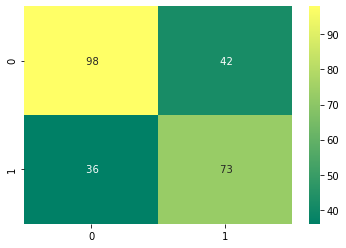

In [169]:
#To find the accuracy by cross evaluation in the training set 
trainresult_NB = cross_val_score(modelNB,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_NB.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelNB,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.709090909090909


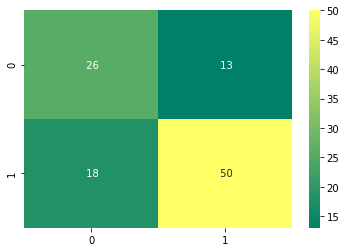

In [170]:
#To find the accuracy by cross evaluation in the testing set
testresult_NB = cross_val_score(modelNB,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_NB.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelNB,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

## 7.5 KNC -- 5

### In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [171]:
for i in range(2,40):
    modelKN = KN(n_neighbors =i)
    modelKN.fit(X_train,Y_train)
    pred_Knn = modelKN.predict(X_test)
    acc1= accuracy_score(pred_Knn,Y_test)
    result_knn= cross_val_score(modelKN,features,target,cv=10,scoring="accuracy")
    print(i, "The cross val score = ", result_knn.mean())

2 The cross val score =  0.6855555555555555
3 The cross val score =  0.7023809523809523
4 The cross val score =  0.6657936507936507
5 The cross val score =  0.6826190476190476
6 The cross val score =  0.6403968253968253
7 The cross val score =  0.6518253968253969
8 The cross val score =  0.6519841269841271
9 The cross val score =  0.6407142857142857
10 The cross val score =  0.6578571428571429
11 The cross val score =  0.657936507936508
12 The cross val score =  0.6382539682539681
13 The cross val score =  0.6411904761904761
14 The cross val score =  0.6494444444444445
15 The cross val score =  0.6294444444444445
16 The cross val score =  0.6322222222222222
17 The cross val score =  0.6296031746031747
18 The cross val score =  0.6126984126984126
19 The cross val score =  0.6097619047619048
20 The cross val score =  0.6065873015873016
21 The cross val score =  0.6125396825396825
22 The cross val score =  0.5815079365079365
23 The cross val score =  0.575952380952381
24 The cross val sco

The Accuracy =  0.5887850467289719
The cross val score =  0.6494444444444445


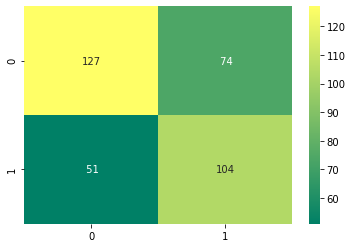

In [172]:
#Using variable modelKN for KNC
modelKN = KN(n_neighbors =14)
#To fit this data of training set of X and Y to the model
modelKN.fit(X_train,Y_train)
#To define the variable pred_Knn to predict in boolean value 
pred_Knn = modelKN.predict(X_test)
#To test how accurately the predition of LR matches with the original data set
acc1= accuracy_score(pred_Knn,Y_test)
print("The Accuracy = ", acc1)
#To find the score by cross evaluation
result_knn= cross_val_score(modelKN,features,target,cv=10,scoring="accuracy")
print("The cross val score = ", result_knn.mean())
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelKN,features, target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.5780000000000001


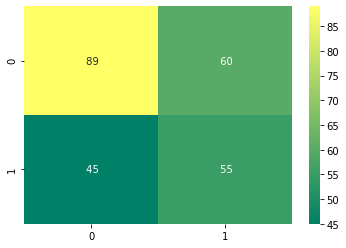

In [173]:
#To find the accuracy by cross evaluation in the training set 
trainresult_KN = cross_val_score(modelKN,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_KN.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelKN,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6090909090909091


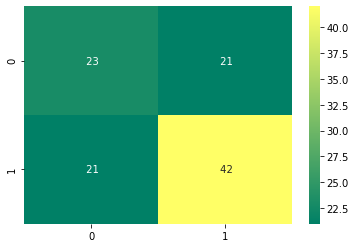

In [174]:
#To find the accuracy by cross evaluation in the testing set
testresult_KN = cross_val_score(modelKN,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_KN.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelKN,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

In [175]:
pred03=modelKN.predict(X_train)

In [176]:
pred04=modelKN.predict(X_test)

In [177]:
accKN=[]
for i in range(3,100,3):
    model = KN(n_neighbors=i)
    model.fit(X_train, Y_train)
    train_acc = np.mean(pred03 == Y_train)
    test_acc = np.mean(pred04== Y_test)
    accKN.append([train_acc, test_acc])

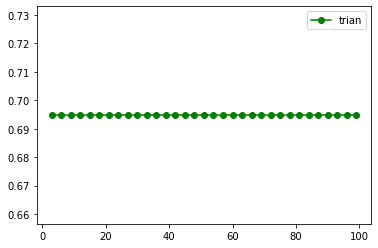

In [178]:
plt.plot(np.arange(3,100,3),[i[0] for i in accKN], "go-")
plt.legend(["trian", "test"])

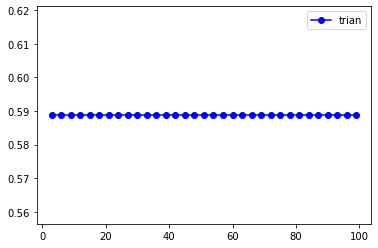

In [179]:
plt.plot(np.arange(3,100,3),[i[1] for i in accKN], "bo-")
plt.legend(["trian", "test"])

## 7.6 SVC -- 6

### A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text. So you're working on a text classification problem.


Accuracy 0.6822429906542056
Cross_val score 0.6857142857142857


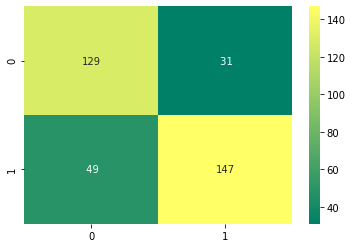

In [180]:
#Using variable modelSV for Support Vector Machine
modelSV = SVC(gamma='auto')
#To fit this data of training set of X and Y to the model
modelSV.fit(X_train,Y_train)
#To define the variable pred_svm to predict in boolean value 
pred_svm = modelSV.predict(X_test)

#To test how accurately the predition of SVM matches with the original data set
acc1 =accuracy_score(pred_svm, Y_test)
print("Accuracy" , acc1)

#To find the score by cross evaluation
result_svm = cross_val_score(modelSV, features,target,cv=10, scoring = "accuracy")
print("Cross_val score", result_svm.mean())

#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelRF,features,target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6908333333333332


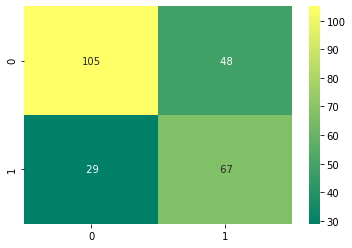

In [181]:
#To find the accuracy by cross evaluation in the training set 
trainresult_SV = cross_val_score(modelSV,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_SV.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelSV,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")


The Accuracy =  0.6254545454545454


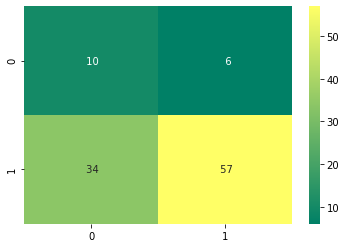

In [182]:
#To find the accuracy by cross evaluation in the testing set
testresult_SV = cross_val_score(modelSV,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_SV.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelSV,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

## 7.7 AdaBoost -- 7

### AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones

Acc =  0.6728971962616822
Cross val score  0.6944444444444444


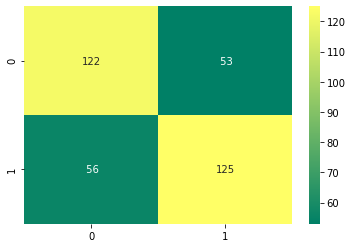

In [183]:
#Using variable modelAB for AdaBoost
modelAB = AdaBoostClassifier()
#To fit this data of training set of X and Y to the model
modelAB.fit(X_train,Y_train)
#To define the variable pred_AB to predict in boolean value 
pred_AB = modelAB.predict(X_test)
#To test how accurately the predition of AB matches with the original data set
acc1 = accuracy_score(pred_AB, Y_test)
print("Acc = ", acc1)
#To find the score by cross evaluation
result_AB = cross_val_score(modelAB, features,target, cv=10, scoring="accuracy")
print("Cross val score ", result_AB.mean())
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelAB, features, target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6823333333333332


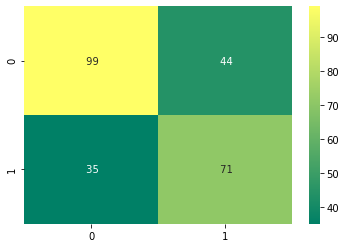

In [184]:
#To find the accuracy by cross evaluation in the training set 
trainresult_AB = cross_val_score(modelAB,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_AB.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelAB,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6536363636363636


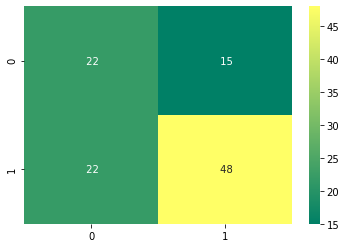

In [185]:
#To find the accuracy by cross evaluation in the testing set
testresult_AB = cross_val_score(modelAB,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_AB.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelAB,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

## 7.8 Gradient Boosting

### Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. 

The accuracy  0.7289719626168224
cross val score  0.7252380952380952


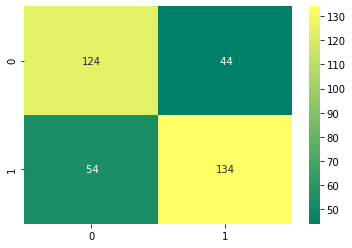

In [186]:
#Using variable modelGB for Gradient Boosting
modelGB =GradientBoostingClassifier()
#To fit this data of training set of X and Y to the model
modelGB.fit(X_train, Y_train)
#To define the variable pred_gb to predict in boolean value
pred_gb = modelGB.predict(X_test)
#To test how accurately the predition of GB matches with the original data set
acc1 = accuracy_score(pred_gb, Y_test)
print("The accuracy ", acc1)

#To find the score by cross evaluation
result_GB = cross_val_score(modelGB, features, target, cv=10, scoring="accuracy")
print("cross val score ", result_GB.mean())

#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelGB, features, target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7146666666666667


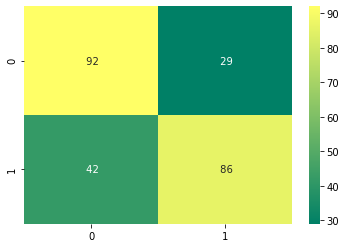

In [187]:
#To find the accuracy by cross evaluation in the training set 
trainresult_GB = cross_val_score(modelGB,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_GB.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelGB,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6345454545454545


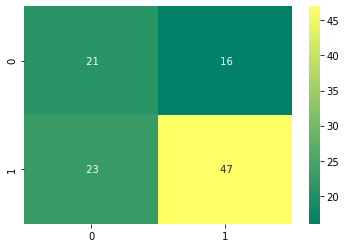

In [188]:
#To find the accuracy by cross evaluation in the testing set
testresult_GB = cross_val_score(modelGB,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_GB.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelGB,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

## 7.9 Bagging

### A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.


In [189]:
#Using variable modelBC for Bagging Classification
modelBC = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
#To fit this data of training set of X and Y to the model
modelBC.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

The accuracy  0.7383177570093458
cross val score  0.7752380952380952


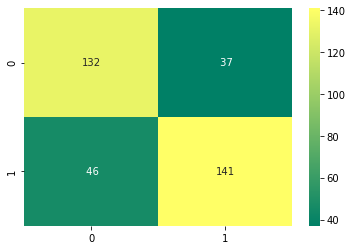

In [190]:
#To define the variable pred_bc to predict in boolean value
pred_bc = modelBC.predict(X_test)
#To test how accurately the predition of BC matches with the original data set
acc1 = accuracy_score(pred_bc, Y_test)
print("The accuracy ", acc1)

#To find the score by cross evaluation
result_BC = cross_val_score(modelBC, features, target, cv=10, scoring="accuracy")
print("cross val score ", result_BC.mean())
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelBC, features, target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")



The Accuracy =  0.7144999999999999


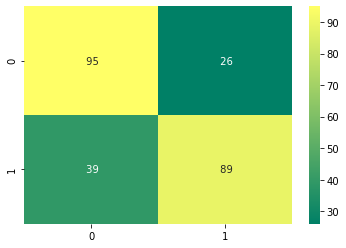

In [191]:
#To find the accuracy by cross evaluation in the training set 
trainresult_BC = cross_val_score(modelBC,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_BC.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelBC,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6236363636363637


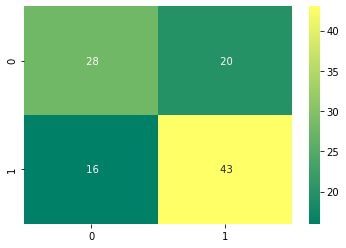

In [192]:
#To find the accuracy by cross evaluation in the testing set
testresult_BC = cross_val_score(modelBC,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_BC.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelBC,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# 8.0 MODEL ANALYSIS

In [193]:
#To make a dataframe to compare the accuracy of the different methods used to predict the dataset 
models= pd.DataFrame({ 
"Model" : ["Logical Regression","Decision Tree", "Random Forest", "Support Vector Machine", "KNN" , "Naive Bayes", "Ada Boost", "Gradient Boost","Bagging"],
"FullScore" : [result_LR.mean(),result_tree.mean(),result_RF.mean(),result_svm.mean(), result_knn.mean(), result_NB.mean(), result_AB.mean(), result_GB.mean(),result_BC.mean()],
"TrainScore": [trainresult_LR.mean(),trainresult_tree.mean(), trainresult_RF.mean(), trainresult_SV.mean(), trainresult_KN.mean(), trainresult_NB.mean(), trainresult_AB.mean(), trainresult_GB.mean(),trainresult_BC.mean()],
"TestScore" : [testresult_LR.mean(),testresult_tree.mean(), testresult_RF.mean(), testresult_SV.mean(), testresult_KN.mean(), testresult_NB.mean(), testresult_AB.mean(), testresult_GB.mean(),testresult_BC.mean()]
})


In [194]:
models.head()

,Model,FullScore,TrainScore,TestScore
0,Logical Regression,0.699286,0.670333,0.700000
1,Decision Tree,0.708492,0.694500,0.615455
2,Random Forest,0.772540,0.747000,0.690909
3,Support Vector Machine,0.685714,0.690833,0.625455
4,KNN,0.649444,0.578000,0.609091


In [195]:
#To order the models by ascending order of their FullScore
models.sort_values(by="FullScore")

,Model,FullScore,TrainScore,TestScore
4,KNN,0.649444,0.578000,0.609091
3,Support Vector Machine,0.685714,0.690833,0.625455
5,Naive Bayes,0.693413,0.686167,0.709091
6,Ada Boost,0.694444,0.682333,0.653636
0,Logical Regression,0.699286,0.670333,0.700000
1,Decision Tree,0.708492,0.694500,0.615455
7,Gradient Boost,0.725238,0.714667,0.634545
2,Random Forest,0.772540,0.747000,0.690909
8,Bagging,0.775238,0.714500,0.623636


In [196]:
# Clearly SVM, KNN and Random Forest have the top three accuracy out of all the methods used 

In [197]:
#To order the models by ascending order of their TrainScore
models.sort_values(by="TrainScore")

,Model,FullScore,TrainScore,TestScore
4,KNN,0.649444,0.578000,0.609091
0,Logical Regression,0.699286,0.670333,0.700000
6,Ada Boost,0.694444,0.682333,0.653636
5,Naive Bayes,0.693413,0.686167,0.709091
3,Support Vector Machine,0.685714,0.690833,0.625455
1,Decision Tree,0.708492,0.694500,0.615455
8,Bagging,0.775238,0.714500,0.623636
7,Gradient Boost,0.725238,0.714667,0.634545
2,Random Forest,0.772540,0.747000,0.690909


In [198]:
#To order the models by ascending order of their TestScore
models.sort_values(by="TestScore")

,Model,FullScore,TrainScore,TestScore
4,KNN,0.649444,0.578000,0.609091
1,Decision Tree,0.708492,0.694500,0.615455
8,Bagging,0.775238,0.714500,0.623636
3,Support Vector Machine,0.685714,0.690833,0.625455
7,Gradient Boost,0.725238,0.714667,0.634545
6,Ada Boost,0.694444,0.682333,0.653636
2,Random Forest,0.772540,0.747000,0.690909
0,Logical Regression,0.699286,0.670333,0.700000
5,Naive Bayes,0.693413,0.686167,0.709091


# 9.0 MODEL GRAPHICAL ANALYSIS

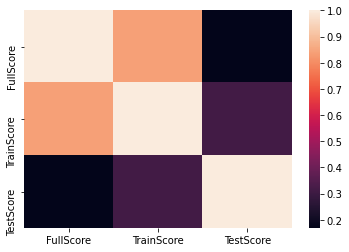

In [199]:
#To Graphical represent the models using colour coded heatmap
sns.heatmap(models.corr()) 

Text(0, 0.5, 'FullScore Accuracy')

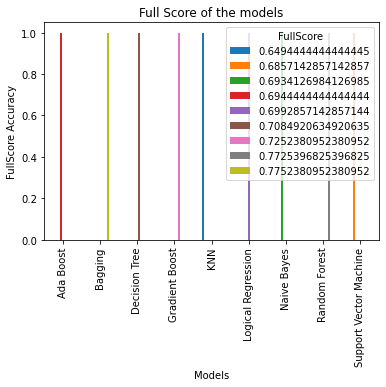

In [200]:
%matplotlib inline
pd.crosstab(models.Model,models.FullScore).plot(kind='bar')
plt.title('Full Score of the models')
plt.xlabel('Models')
plt.ylabel('FullScore Accuracy')

In [201]:
data.shape

(356, 4)

# 10.0 MAX VOTING

### The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

## 10.1 METHOD 1

In [202]:
# Used this method to explain and show clearly what max voting does. 

In [203]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, statistics.mode([pred_svm[i], pred_bc[i], pred_Knn[i]]))
    #SVM, BC and KNN being the top three accuracy models, we take a mode of them all. 

In [204]:

final_pred

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1.])

In [205]:
accL =accuracy_score(final_pred, Y_test)

In [206]:
accL

0.6635514018691588

In [207]:
#The accuracy is more than that of SVM (the top model)

## 10.2 METHOD 2

In [208]:
# In this method we can create a model out of all these hence we can find the Cross Val Score for more efficiency

In [209]:
MODEL101 = VotingClassifier(estimators=[('bc', modelBC), ('sv', modelSV), ('kn', modelKN)], voting='hard')

In [210]:
result101 = cross_val_score(MODEL101, features, target, cv=10, scoring="accuracy")
print("cross val score ", result101.mean())

cross val score  0.7166666666666667


In [211]:
#The cross val score is less than that of the SVM 

# 11.0 PICKLING 

## Pickling is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream is converted back into an object hierarchy.


# pickle.dump(obj, file)
## Write the pickled representation of the object obj to the open file object file. 

# pickle.load(file)
### Read the pickled representation of an object from the open file object file and return the reconstituted object hierarchy specified therein. 

In [212]:
#Since it's the top model 
SupportVector = SVC(gamma='auto').fit(features,target)

In [213]:
pickle.dump(SupportVector, open('MODEL_FINAL','wb'))

In [214]:
MODEL_FINAL = pickle.load(open('MODEL_FINAL','rb'))

In [215]:
print(MODEL_FINAL.predict([[638, 3528,  86]]))

[0]


In [216]:
p = MODEL_FINAL.predict(X_test)
#print(X_Test)
print(list(p).count(1))
print(list(p).count(0))

63
44


In [217]:
#Since this model is an object in the hardware of this device we can call it from any notebook using the following commented line:
#import pickle
#MODEL_FINAL = pickle.load(open('MODEL_FINAL','rb'))
#print(MODEL_FINAL.predict([[638, 3528,  86]]))